In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
CONSUMER_KEY='dW0F96tqOys7GeEbXczkMhWK7'
CONSUMER_SECRET='S8gdszGzumbWaxHqSeYzahSAyYKtVaRRnhDNAyfdP68RCTvtbe'
ACCESS_TOKEN= '1003350233600819200-J6409cpQx93VWr2hG6hrqk6o838FO3'
ACCESS_SECRET='mAliMGs8Vf9gBAiRxHMNpaOLsckiNU8jDQYHGtsRxtOIb'

def twitter_setup():
    
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

In [26]:
extractor = twitter_setup()
tweets = extractor.user_timeline(screen_name="India", count=1000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 199.

5 recent tweets:

@officialmcafee @JSaneOfficial John, my idol, pls follow me.

RT @Claudiu86bogdan: Vote and retweet ! Let's help our beloved project to be added on another exchange . @Digibyte @Dgb #Digibytecoin https…

RT @domain: https://t.co/9FA84WrSel just enjoy discount with the reffer code! https://t.co/X7nnC6qt8g

get on the train of MTC right now. the next bitcoin in the field of Telemedical https://t.co/Qah3m0T4Ml

https://t.co/aZ6ObWYBdl



In [43]:
public_tweets= api.search('Narendra Modi')
for tweet in public_tweets:
    print(tweet.text)
    analysis= TextBlob(tweet.text)

RT @cjwerleman: India: "In the name of Hindutva, the rule of law is made to disappear and mob violence prevails. And because perpetrators o…
RT @davidfrawleyved: Who in the motley crew of opposition leaders would you feel safer than Narendra Modi as PM of India? 
Rahul, Mamata, L…
RT @CTRavi_BJP: Scenario in 2019:

Vote CONgress to defeat Modi
Vote TMC to defeat Modi
Vote SP to defeat Modi
Vote BSP to defeat Modi
Vote…
RT @sambitswaraj: It’s not just the not yet formed “महागठबंधन” that desperately wants to stop India from having Modi as it’s PM in 2019 ..t…
RT @INCIndia: If the religious minorities feel deep down in their hearts that their place is that of ‘second-class citizens’, we are not wo…
RT @65thakursahab: Poor man to Narendra Damodardas Modi : Sir Diesel is very costly.
NDM : Bolo Bharat Mata Ki Jai, and here, take this set…
RT @CTRavi_BJP: Scenario in 2019:

Vote CONgress to defeat Modi
Vote TMC to defeat Modi
Vote SP to defeat Modi
Vote BSP to defeat Modi
Vote…
RT @sanjivbha

In [44]:
data = pd.DataFrame(data=[tweet.text], columns=['Tweets'])
display(data.head(10))

,Tweets
0,RT @INCIndia: If the religious minorities feel...


In [28]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1002325794884972544
2018-05-31 23:07:46
Twitter for Android
1
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'officialmcafee', 'name': 'John McAfee', 'id': 961445378, 'id_str': '961445378', 'indices': [0, 15]}, {'screen_name': 'JSaneOfficial', 'name': 'Justin Sane ⚡️ $trx 🐳 {Not giving away ETH}', 'id': 997220934, 'id_str': '997220934', 'indices': [16, 30]}], 'urls': []}


In [29]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])


In [30]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,"@officialmcafee @JSaneOfficial John, my idol, ...",60,1002325794884972544,2018-05-31 23:07:46,Twitter for Android,1,0
1,RT @Claudiu86bogdan: Vote and retweet ! Let's ...,140,1002242428387000320,2018-05-31 17:36:30,Twitter for Android,0,7
2,RT @domain: https://t.co/9FA84WrSel just enjoy...,101,1001884476958359552,2018-05-30 17:54:08,Twitter for Android,0,2
3,get on the train of MTC right now. the next bi...,103,1001840430646870016,2018-05-30 14:59:06,Twitter for Android,0,0
4,https://t.co/aZ6ObWYBdl,23,1000478788549931009,2018-05-26 20:48:25,Twitter for Android,0,0
5,I voted #DIGIBYTE for #ProjectBillboardLA! Vot...,77,999794109622579200,2018-05-24 23:27:45,Twitter for Android,8,4
6,Go to buy $elf ASAP! it is going to the moon,44,991950693551423488,2018-05-03 08:00:49,Twitter for Android,0,1
7,"just buy Aelf, DGB and Theta",28,989831811831287809,2018-04-27 11:41:08,Twitter for Android,0,0
8,in Shenzhen https://t.co/2I6Vr8EaxZ,35,987008544238022656,2018-04-19 16:42:29,Twitter for Android,1,0
9,Come to vote for the best future coin DGB! htt...,66,979050367701798912,2018-03-28 17:39:32,Twitter for Android,0,0


In [31]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 62.08040201005025


In [32]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Hand in hand together for future! https://t.co/Vks0rmS4Jq
Number of likes: 25
57 characters.

The tweet with more retweets is: 
RT @anandmahindra: At first I couldn't bear to look &amp; then I was left feeling uplifted. I don't think I will ever complain again about any…
Number of retweets: 37438
143 characters.



In [33]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

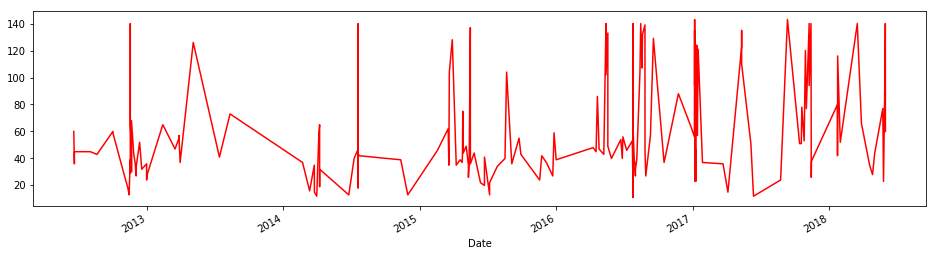

In [34]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

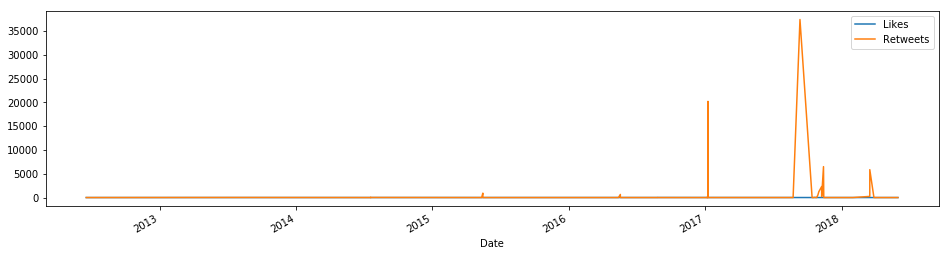

In [35]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [36]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter for iPhone
* Twitter Web Client
* Twitter for Websites
* Twitter for iPad


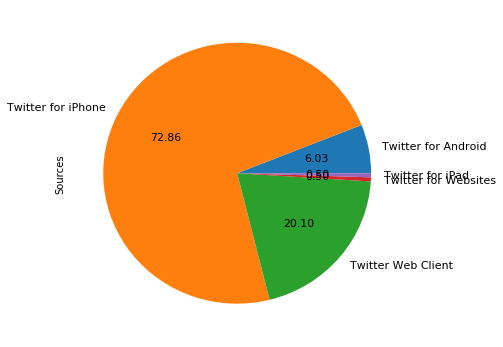

In [37]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [38]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [39]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"@officialmcafee @JSaneOfficial John, my idol, ...",60,1002325794884972544,2018-05-31 23:07:46,Twitter for Android,1,0,0
1,RT @Claudiu86bogdan: Vote and retweet ! Let's ...,140,1002242428387000320,2018-05-31 17:36:30,Twitter for Android,0,7,1
2,RT @domain: https://t.co/9FA84WrSel just enjoy...,101,1001884476958359552,2018-05-30 17:54:08,Twitter for Android,0,2,1
3,get on the train of MTC right now. the next bi...,103,1001840430646870016,2018-05-30 14:59:06,Twitter for Android,0,0,1
4,https://t.co/aZ6ObWYBdl,23,1000478788549931009,2018-05-26 20:48:25,Twitter for Android,0,0,0
5,I voted #DIGIBYTE for #ProjectBillboardLA! Vot...,77,999794109622579200,2018-05-24 23:27:45,Twitter for Android,8,4,0
6,Go to buy $elf ASAP! it is going to the moon,44,991950693551423488,2018-05-03 08:00:49,Twitter for Android,0,1,0
7,"just buy Aelf, DGB and Theta",28,989831811831287809,2018-04-27 11:41:08,Twitter for Android,0,0,0
8,in Shenzhen https://t.co/2I6Vr8EaxZ,35,987008544238022656,2018-04-19 16:42:29,Twitter for Android,1,0,0
9,Come to vote for the best future coin DGB! htt...,66,979050367701798912,2018-03-28 17:39:32,Twitter for Android,0,0,1


In [40]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 44.221105527638194%
Percentage of neutral tweets: 50.25125628140704%
Percentage de negative tweets: 5.527638190954774%
